<a href="https://colab.research.google.com/github/Muhammad-Nisar-7/Machine-Learning/blob/main/RossmannStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets --quiet
import opendatasets as od
import os
import pandas as pd

In [3]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadn1sar
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 184MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [4]:
os.listdir('rossmann-store-sales')

['store.csv', 'sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory = False)

In [6]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv')

In [8]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
merged_df = ross_df.merge(store_df, how = 'left', on = 'Store')

In [10]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
merged_df.shape

(1017209, 18)

In [12]:
test_df = pd.read_csv('./rossmann-store-sales/test.csv')

In [13]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [14]:
merged_test_df = test_df.merge(store_df, how = "left", on = 'Store')

In [15]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [17]:
merged_df.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [18]:
round(merged_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [19]:
merged_df.duplicated().sum()

0

In [20]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [21]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [22]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [23]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

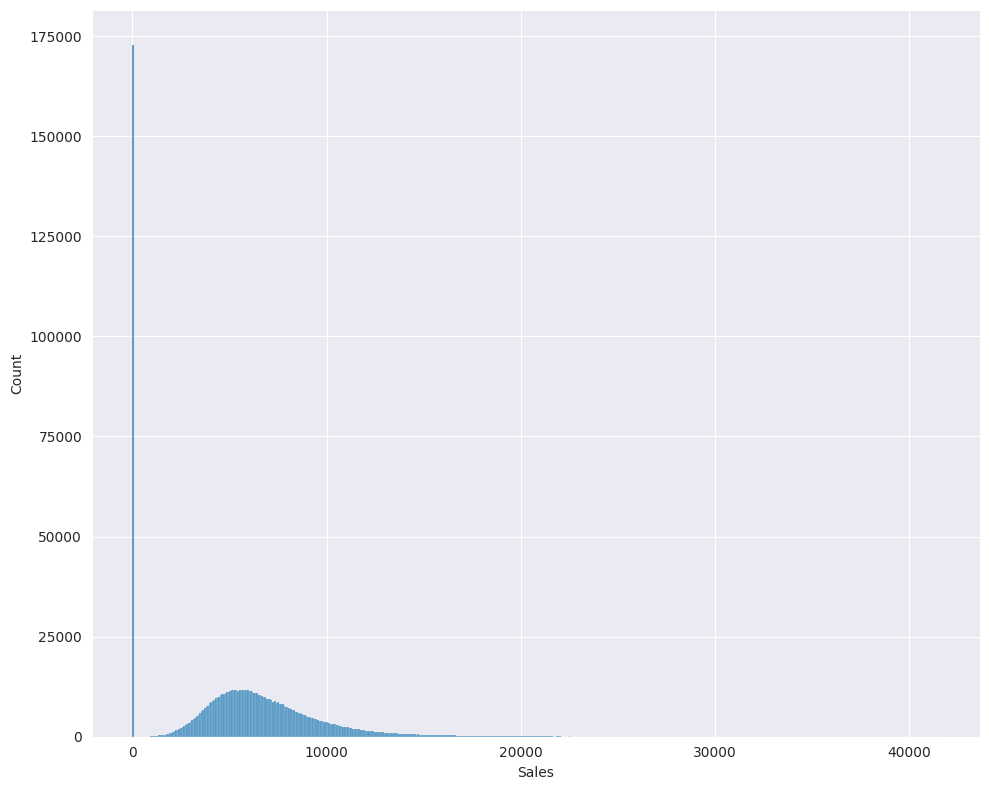

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(merged_df, x='Sales', ax=ax)
plt.tight_layout()
plt.show()


In [25]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


In [26]:
merged_df = merged_df[merged_df.Open == 1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

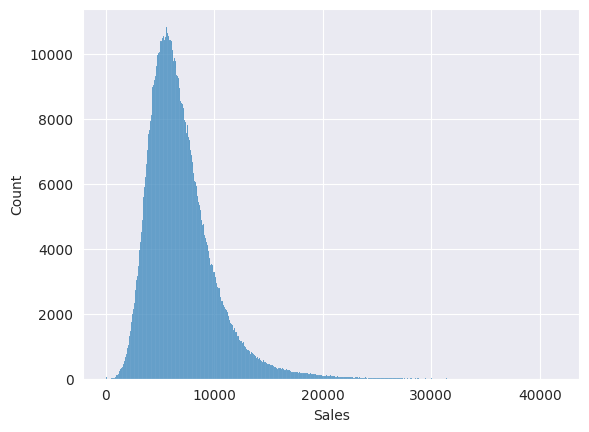

In [27]:
sns.histplot(data = merged_df, x = 'Sales')

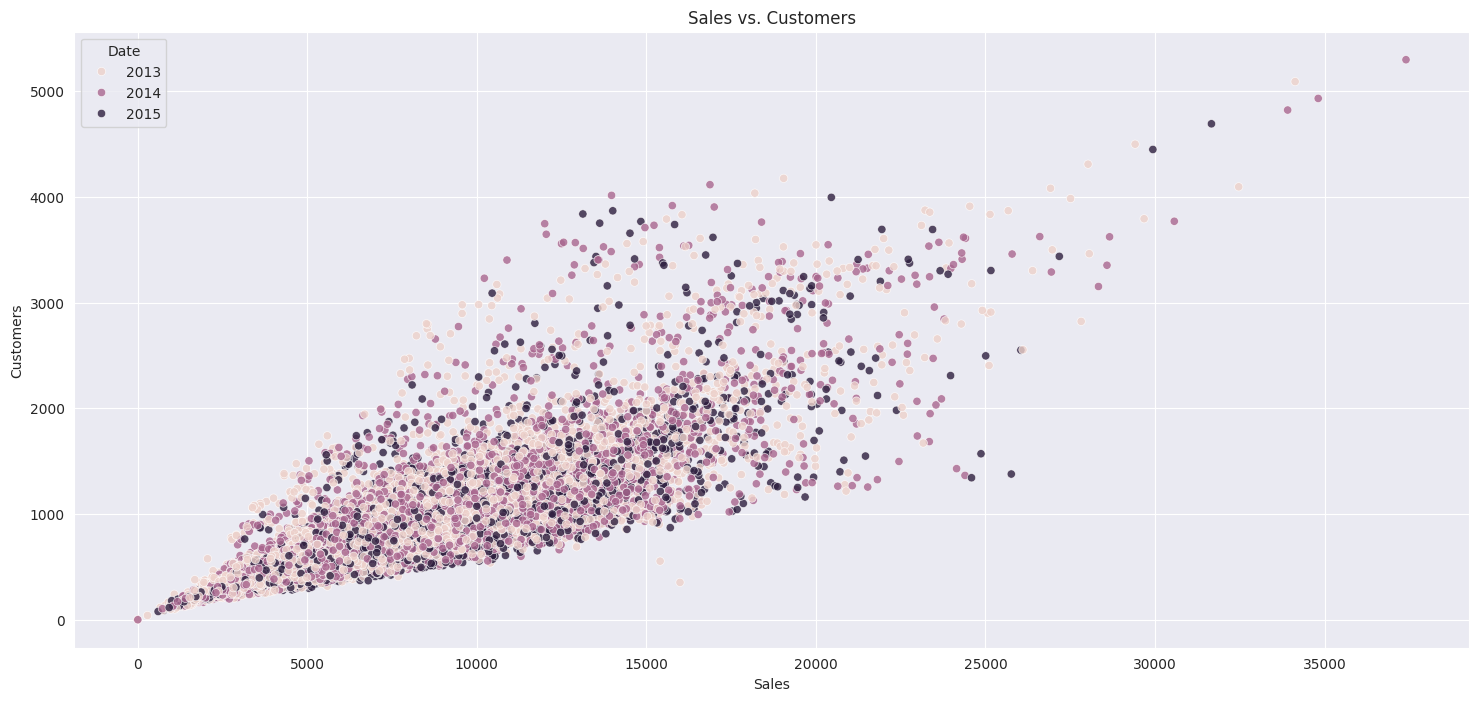

In [28]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x = temp_df.Sales, y = temp_df.Customers, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title("Sales vs. Customers")
plt.show()

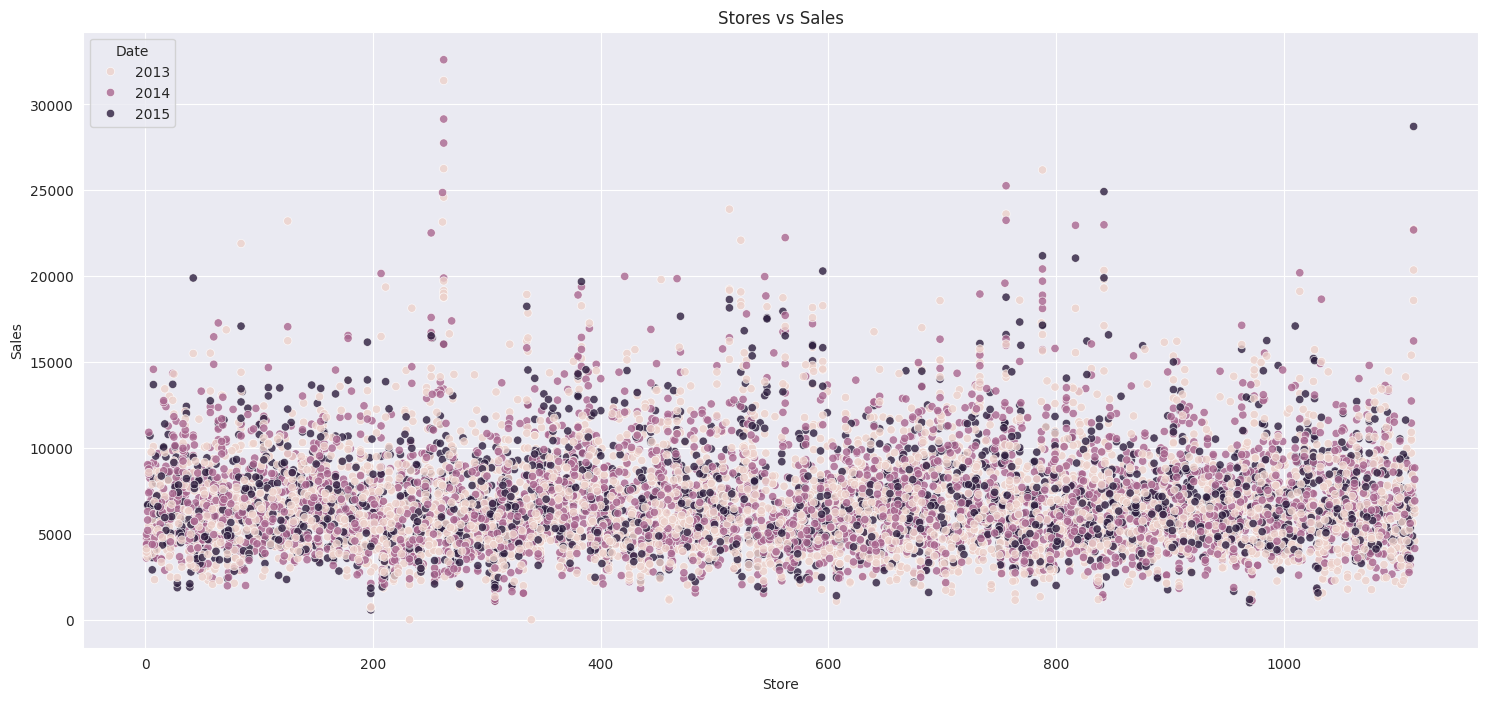

In [29]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x = temp_df.Store, y = temp_df.Sales, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title('Stores vs Sales')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

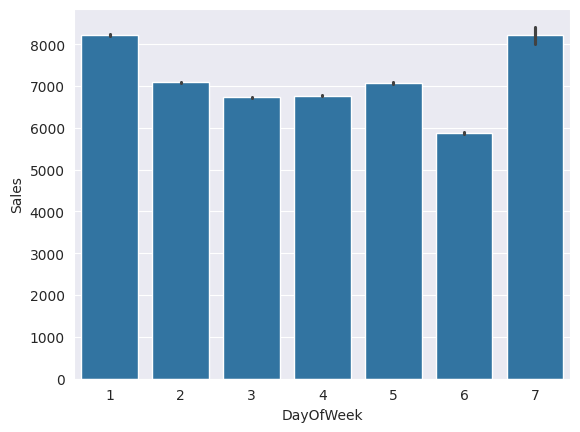

In [30]:
sns.barplot(data = merged_df, x = 'DayOfWeek', y = 'Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

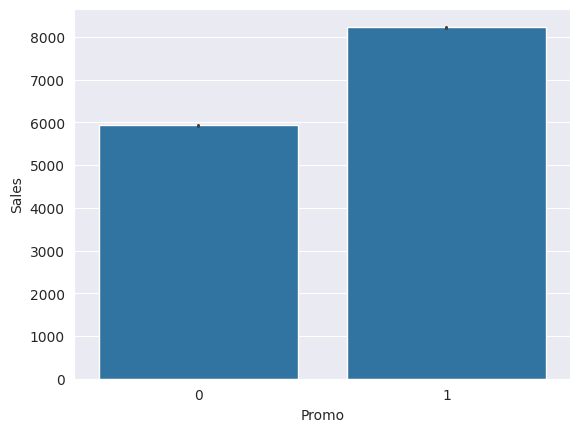

In [31]:
sns.barplot(data = merged_df, x = 'Promo', y = 'Sales')

In [32]:
import numpy as np
merged_df.select_dtypes(include = [np.number]).corr()['Sales'].sort_values(ascending = False)

,Sales
Sales,1.000000
Customers,0.823597
Promo,0.368145
Promo2SinceWeek,0.095311
SchoolHoliday,0.038617
CompetitionOpenSinceYear,0.016101
Store,0.007710
Promo2SinceYear,-0.034713
CompetitionDistance,-0.036396
CompetitionOpenSinceMonth,-0.043489


In [33]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [34]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

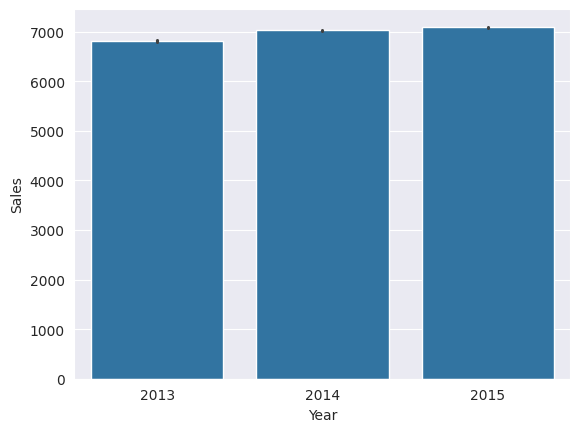

In [35]:
sns.barplot(data = merged_df, x= 'Year', y = 'Sales')

<Axes: xlabel='Month', ylabel='Sales'>

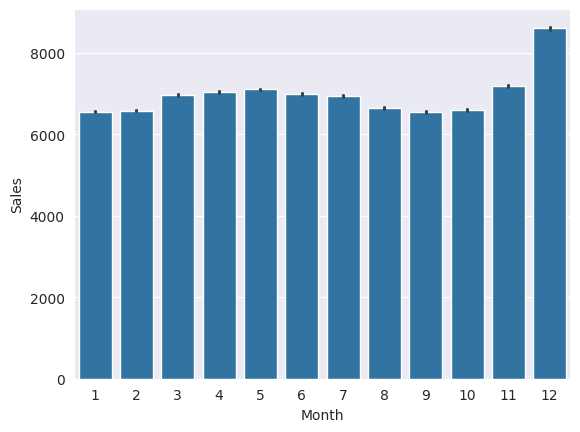

In [36]:
sns.barplot(data = merged_df, x = 'Month', y = 'Sales')

In [37]:
len(merged_df)

844392

In [38]:
sorted_df = merged_df.sort_values('Date')

In [39]:
sorted_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013


In [40]:
train_size = int(0.75 *len(merged_df))
train_size

633294

In [41]:
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [42]:
len(train_df), len(val_df)

(633294, 211098)

In [43]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [44]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [45]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [46]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [47]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [48]:
input_cols = ['Store','DayOfWeek','Promo','StateHoliday',
              'StoreType', 'Assortment','Day', 'Month', 'Year']

In [49]:
target_col = 'Sales'

In [50]:
merged_df[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,4
StoreType,4
Assortment,3
Day,31
Month,12
Year,3


In [51]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [52]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [53]:
test_inputs = merged_test_df[input_cols].copy()

In [54]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols= ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [55]:
from sklearn.impute import SimpleImputer

In [56]:
imputer = SimpleImputer(strategy = 'mean').fit(train_inputs[numeric_cols])

In [57]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

In [58]:
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])

In [59]:
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [62]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(train_inputs[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [65]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [66]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [67]:
train_inputs.head()

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [68]:
X_train = train_inputs[numeric_cols + encoded_cols].copy()
X_val = val_inputs[numeric_cols + encoded_cols].copy()
X_test = test_inputs[numeric_cols + encoded_cols].copy()

In [69]:
def return_mean(inputs):
  return np.full(len(inputs), merged_df.Sales.mean())

In [70]:
train_preds = return_mean(X_train)

In [71]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
mean_squared_error(train_preds, train_targets, squared =  False)

3082.450443277419

In [74]:
mean_squared_error(return_mean(X_val), val_targets, squared = False)

3168.6033635047716

In [75]:
def guess_random(inputs):
  lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
  return np.random.random(len(inputs)) * (hi-lo) + lo

In [76]:
train_preds = guess_random(X_train)

In [77]:
train_preds

array([38547.24654679, 32713.87270046,  6546.6004923 , ...,
       25211.62943047, 12239.00601564, 32728.4735792 ])

In [78]:
mean_squared_error(train_preds, train_targets, squared=False)

18621.084352840826

In [79]:
mean_squared_error(guess_random(X_val), val_targets, squared = False)

18388.431701824153

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
linreg = LinearRegression()

In [82]:
linreg.fit(X_train, train_targets)

LinearRegression()

In [83]:
linreg.coef_

array([ 1.04781334e+02, -9.97982019e+01,  6.51172904e+02,  1.05495132e+02,
       -8.84995136e+13, -8.84995136e+13, -8.84995136e+13, -8.84995136e+13,
       -8.84995136e+13, -8.84995136e+13, -8.84995136e+13, -1.62329335e+14,
       -1.62329335e+14, -2.05291188e+13, -2.05291188e+13, -2.05291188e+13,
       -2.05291188e+13, -1.54341191e+15, -1.54341191e+15, -1.54341191e+15,
       -1.54341191e+15, -1.86490234e+15, -1.86490234e+15, -1.86490234e+15])

In [84]:
train_preds = linreg.predict(X_train)

In [85]:
train_preds

array([ 7115. , 10581. ,  7036. , ...,  6243. ,  5999. ,  5618.5])

In [86]:
mean_squared_error(train_preds, train_targets, squared = False)

2741.5860353706703

In [87]:
val_preds = linreg.predict(X_val)
mean_squared_error(val_preds, val_targets, squared = False)

2817.656190781348

In [88]:
def try_model(model):
  model.fit(X_train, train_targets)
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)

  train_rmse = mean_squared_error(train_preds, train_targets, squared=False)
  val_rmse = mean_squared_error(val_preds, val_targets,  squared= False )
  return train_rmse, val_rmse

In [89]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [90]:
model = LinearRegression()
try_model(model)

(2741.5860353706703, 2817.656190781348)

In [91]:
try_model(Ridge())

(2741.5871950814444, 2817.7784665409868)

In [92]:
try_model(Lasso())
?Lasso

In [93]:
try_model(ElasticNet())

(2879.0432103903954, 2972.6658860503385)

In [94]:
try_model(SGDRegressor())

(2742.2990546894634, 2815.089932494664)

In [95]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [96]:
tree = DecisionTreeRegressor(random_state = 42)
try_model(tree)

(0.0, 1559.7378600480247)

[Text(0.5, 0.9, 'Promo_0 <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.7, 'DayOfWeek_1 <= 0.5\nsquared_error = 10053046.41\nsamples = 280741\nvalue = 8160.121'),
 Text(0.125, 0.5, 'Month <= 0.955\nsquared_error = 8559596.144\nsamples = 223344\nvalue = 7757.247'),
 Text(0.0625, 0.3, 'StoreType_b <= 0.5\nsquared_error = 7967330.328\nsamples = 210684\nvalue = 7631.861'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Day <= 0.35\nsquared_error = 13800173.481\nsamples = 12660\nvalue = 9843.895'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Month <= 0.955\nsquared_error = 12775230.673\nsamples = 57397\nvalue = 9727.788'),
 Text(0.3125, 0.3, 'Day <= 0.95\nsquared_error = 11907411.6\nsamples = 54232\nvalue = 9578.715'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Day <= 0.267\nsquared_error = 20739758.

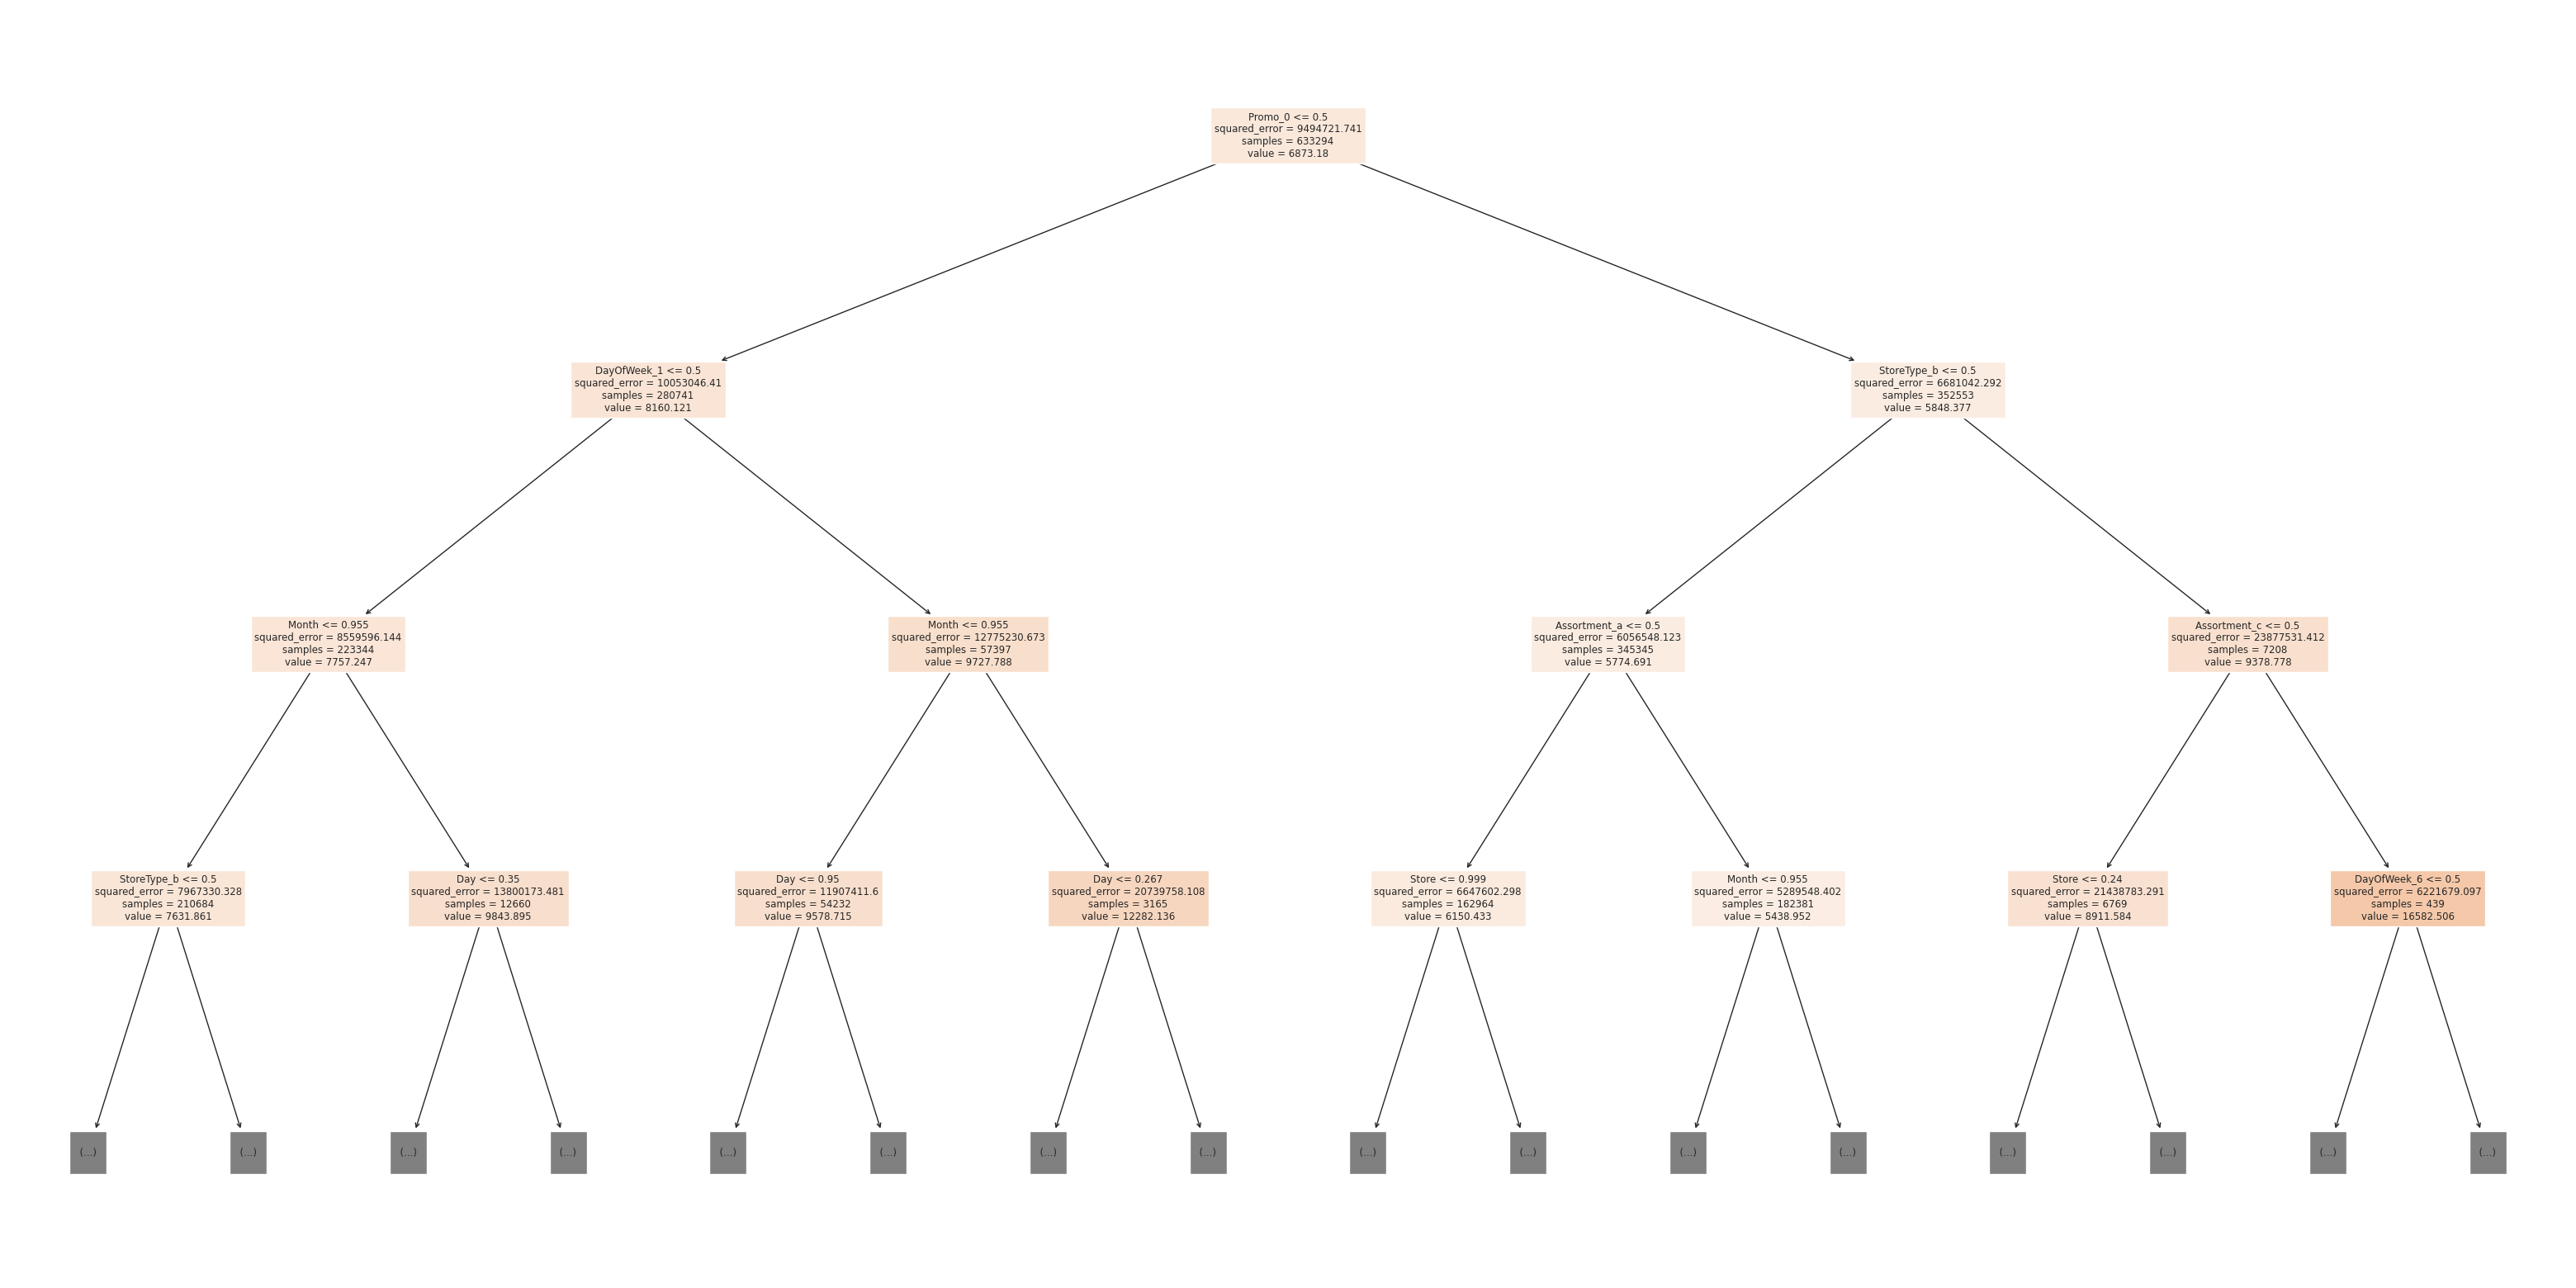

In [97]:
plt.figure(figsize = (40,20))
plot_tree(tree, filled = True, feature_names=X_train.columns, max_depth = 3)

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
rf = RandomForestRegressor(random_state = 42, n_jobs = -1)

In [100]:
try_model(rf)

(474.9198974666898, 1371.7321923469985)

In [101]:
tree.tree_.max_depth

61

In [102]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [106]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending = False)

importance_df.head(10)

,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


<Axes: xlabel='importance', ylabel='feature'>

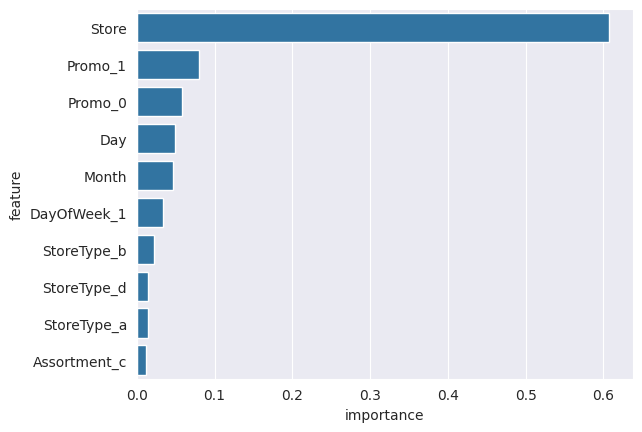

In [109]:
sns.barplot(importance_df.head(10), x = 'importance', y = 'feature')

In [111]:
def predict_input(model, single_input):
  if single_input['Open'] == 0:
    return 0
  input_df = pd.DataFrame([single_input])
  input_df['Date'] = pd.to_datetime(input_df.Date)
  input_df['Day'] = input_df.Date.dt.day
  input_df['Month'] = input_df.Date.dt.month
  input_df['Year'] = input_df.Date.dt.year
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  X_input = input_df[numeric_cols + encoded_cols]
  pred = model.predict(X_input)[0]
  return pred

In [123]:
sample_input = {'Id':1,
                'Store':2,
                'DayOfWeek':4,
                'Date': '2015-09-17',
                'Open': 1.0,
                'Promo':0,
                'StateHoliday':'1',
                'SchoolHoliday':1,
                'StoreType':'c',
                'Assortment':'a',
                'CompetitionDistance': 1270.0,
                'CompetitionOpenSinceMonth': 9.0,
                'CompetitionOpenSinceYear': 2008.0,
                'Promo2': 1.0,
                'Promo2SinceWeek': np.nan,
                'Promo2SinceYear': np.nan,
                'PromoInterval': np.nan
                }
sample_input

{'Id': 1,
 'Store': 2,
 'DayOfWeek': 4,
 'Date': '2015-09-17',
 'Open': 1.0,
 'Promo': 0,
 'StateHoliday': '1',
 'SchoolHoliday': 1,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 1.0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [124]:
predict_input(rf, sample_input)

3500.55

In [126]:
test_preds = rf.predict(X_test)
test_preds

array([ 4258.01,  7713.83,  8775.7 , ...,  5954.68, 20823.07,  6748.48])

In [127]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [128]:
submission_df['Sales'] = test_preds * test_df['Open'].astype('float')

In [130]:
submission_df.fillna(0, inplace = True)
submission_df.head()

,Id,Sales
0,1,4258.01
1,2,7713.83
2,3,8775.70
3,4,6775.37
4,5,6492.47


In [131]:
submission_df.to_csv('submission.csv', index = None)

In [132]:
!head submission.csv

Id,Sales
1,4258.01
2,7713.83
3,8775.7
4,6775.37
5,6492.47
6,5750.74
7,8081.26
8,8166.45
9,5893.82


In [133]:
from IPython.display import FileLink

In [134]:
FileLink('submission.csv')

/content/submission.csv